## Boiler Plate

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
## Unzipping data and moving it in right location
#!p7zip -d ./data/all.7z
#!mkdir data
#!mv negative data/
#!mv positive data/

## Library and Helper functions

In [2]:
from audio import *
from tqdm import tqdm_notebook

C:\Users\BigMachine\AppData\Local\Continuum\anaconda3\lib\site-packages\torchaudio\extension\extension.py:14: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [3]:
from sklearn.metrics import (
    roc_curve,
    auc,
    roc_auc_score,
    confusion_matrix,
    precision_recall_curve,
    average_precision_score,
    accuracy_score,
    f1_score
)

def plot_confusion_matrix(
    y_true,
    y_pred,
    classes,
    normalize=False,
    title="Confusion matrix",
    cmap=plt.cm.Blues,
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Data Check

Sample Rates: 
20000: 9269 files


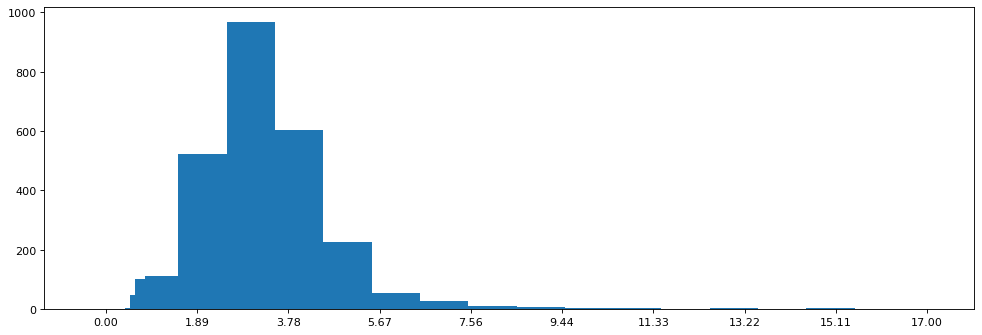

In [36]:
data_folder = Path("./data/")
audios = AudioList.from_folder(data_folder)
len_dict = audios.stats(prec=1)

## Load Data

In [5]:
## Creating Data Bunch
config = AudioConfig(standardize=False, 
                     sg_cfg=SpectrogramConfig(
                         f_min=0.0,  ## Minimum frequency
                         f_max=10000, ## Maximum Frequency
                         hop_length=256,
                         n_fft=2560, 
                         n_mels=256, ## Mel bins
                         pad=0, 
                         to_db_scale=True, ## Converting to DB sclae
                         top_db=100,  ## Top decible sound
                         win_length=None, 
                         n_mfcc=20)
                    )
config.duration = 4000 ## 4 sec padding or snip
config.resample_to=20000 ## Every sample at 20000 frequency
config

AudioConfig(cache=True, duration=4000, max_to_pad=None, pad_mode='zeros', remove_silence=None, use_spectro=True, mfcc=False, delta=False, silence_padding=200, silence_threshold=20, segment_size=None, resample_to=20000, standardize=False, downmix=False, sg_cfg=SpectrogramConfig(f_min=0.0, f_max=10000, hop_length=256, n_fft=2560, n_mels=256, pad=0, to_db_scale=True, top_db=100, win_length=None, n_mfcc=20))

In [99]:
## Creating Data Loader
audios = AudioList.from_folder(data_folder, config=config).split_by_rand_pct(.2, seed=4).label_from_folder()

Preprocessing: Resampling to 20000


Preprocessing: Resampling to 20000


------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/os_9_27_2017_08_30_00__0000_57.0_59.0_call.wav-28ecd4bdd077884b237cb536db40c0a0/0.wav
Total Length: 2.0 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


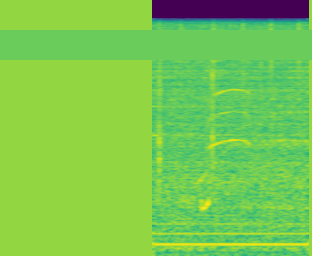

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/610620010_18.0_21.0_call.wav-8d64e343bee2e7e8c4e7b61f895e1192/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


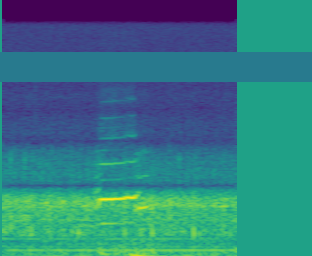

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/64031_683.0_686.0_call.wav-079949307199879ff5b663d2771115ac/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


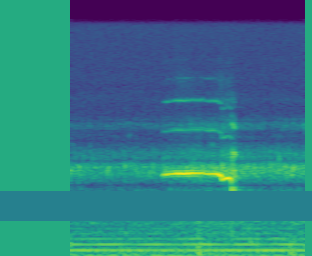

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/9230402w_0.0_3.0_call.wav-6983ffc707e0eb46c1b1bfb35be17473/0.wav
Total Length: 2.26 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


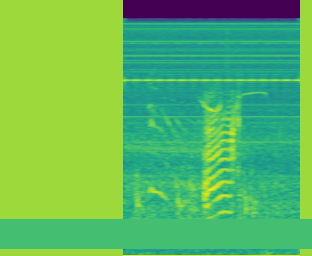

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/9230401a_0.0_2.0_call.wav-70bd9cc44314c8db0fa6d15134463414/0.wav
Total Length: 1.81 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


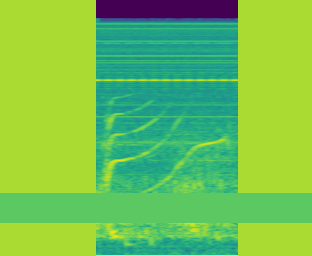

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/9774300t_0.0_3.0_call.wav-994b871fc9481c9eed33f629cc3e6111/0.wav
Total Length: 2.41 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


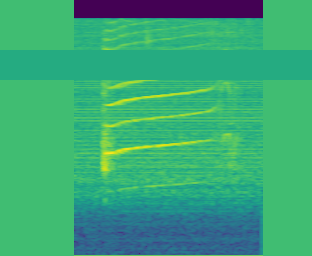

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/9776101q_0.0_2.0_call.wav-0544bc57ffdc8155d76a4596d380bb52/0.wav
Total Length: 1.08 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


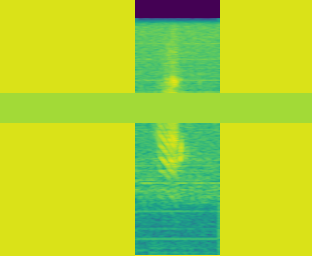

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/1562340736_0009_6.0_9.0_call.wav-8b958b0947c2dc8d418050482c89d988/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


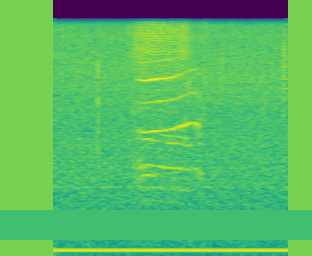

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/1562340736_000a_39.0_42.0_call.wav-97c450db1e418c13bca60300fb7b1c7a/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


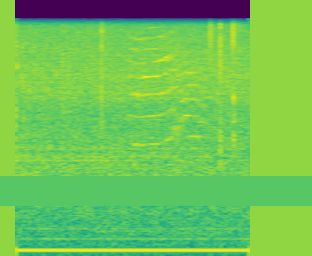

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/9750403j_0.0_2.0_call.wav-89f891ce43e2cd5e9c3e7ad4b89f1a42/0.wav
Total Length: 1.15 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


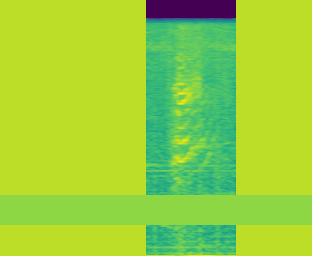

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/1562344334_000b_26.0_30.0_call.wav-e572dc0c4c3f6dbd0c4417ddd8a75266/0.wav
Total Length: 4.0 seconds
Number of Channels: 1
Label: positive
0.01s-4.01s of original clip


Channel 0.0 (256x312):


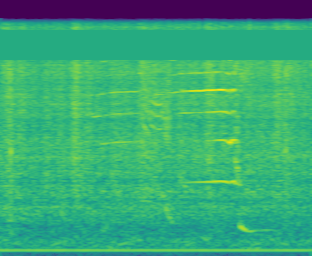

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/1562344334_000c_8.0_11.0_call.wav-904c4f4ce962f846279fb8c683980682/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


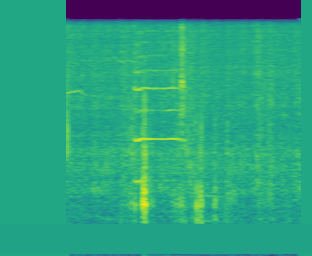

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/64031_335.0_339.0_call.wav-d3fd91b02f001d4f377720f1136cea14/0.wav
Total Length: 4.0 seconds
Number of Channels: 1
Label: positive
0.0s-4.0s of original clip


Channel 0.0 (256x312):


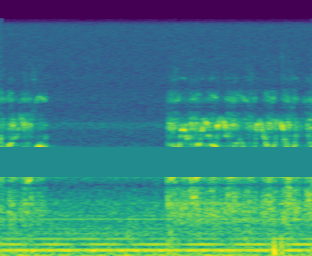

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/670230006_33.0_37.0_call.wav-a3d0a112d2ff0622eca2bea877f92777/0.wav
Total Length: 4.0 seconds
Number of Channels: 1
Label: positive
0.01s-4.01s of original clip


Channel 0.0 (256x312):


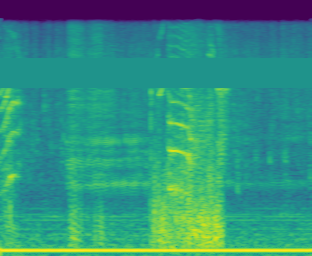

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/97763007_0.0_2.0_call.wav-ae5d8c89fa2a11f28fb89c6960117275/0.wav
Total Length: 1.82 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


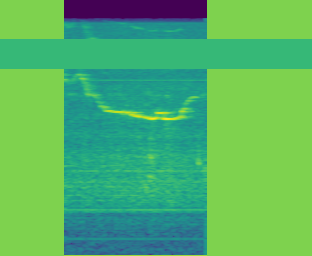

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/60026_719.0_723.0_call.wav-98f61b3adc19cd829faa9e074a1ca7a4/0.wav
Total Length: 4.0 seconds
Number of Channels: 1
Label: positive
0.0s-4.0s of original clip


Channel 0.0 (256x312):


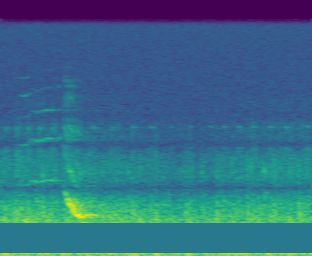

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/9776100r_0.0_2.0_call.wav-85434a428badfb11a06732f91cb93fa9/0.wav
Total Length: 1.4 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


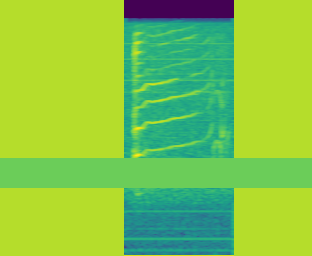

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/os_9_27_2017_08_14_00__0000_21.0_25.0_call.wav-1d6222a9ff4e1051a626472b511f1994/0.wav
Total Length: 4.0 seconds
Number of Channels: 1
Label: positive
0.01s-4.01s of original clip


Channel 0.0 (256x312):


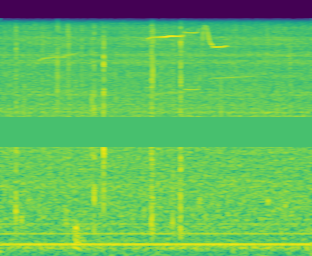

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/670230000_53.0_56.0_call.wav-7d658c58c79211845f599363940b4c58/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


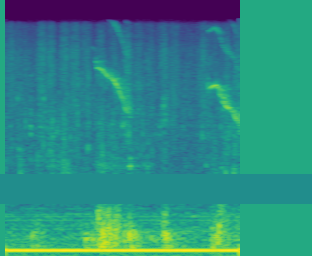

------------------------------------------------------------
File: /home/aayushmnit/.fastai/cache/rs_20000/9761900d_0.0_2.0_call.wav-7d3930ee3afa7b12d92ca1ae079131ef/0.wav
Total Length: 1.75 seconds
Number of Channels: 1
Label: positive


Channel 0.0 (256x312):


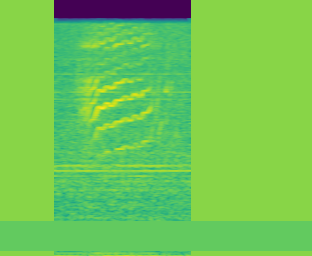

In [100]:
## Defining Transformation
tfms = None

## Frequency masking:ON
tfms = get_spectro_transforms(mask_time=False, mask_freq=True, roll=False) 

## Creating a databunch
db = audios.transform(tfms).databunch(bs=64)

## Let's insepect some data
db.show_batch(20)

## Model Training

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


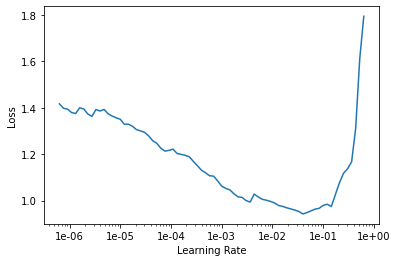

In [106]:
## Default learner is ResNet 18
learn = audio_learner(db)

## Find ideal learning rate
learn.lr_find()
learn.recorder.plot()

In [107]:
## 1-cycle learning (5 epochs and variable learning rate)
learn.fit_one_cycle(5, slice(2e-3, 2e-2))

In [109]:
learn.save('stg1-rn18')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


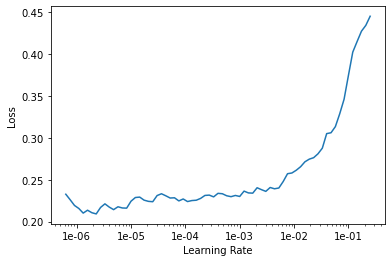

In [108]:
## Find ideal learning rate
learn.lr_find()
learn.recorder.plot()

In [110]:
## 1-cycle learning (5 epochs and variable learning rate)
learn.fit_one_cycle(5, slice(1e-5, 1e-3))

In [111]:
learn.save('stg2-rn18')

In [170]:
learn.export('models/stg2-rn18.pkl')

## Model Evaluation

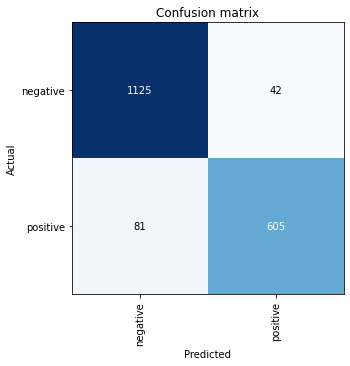

In [115]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(5,5))

File: /home/aayushmnit/.fastai/cache/rs_20000/64025_303.0_307.0_call.wav-823b8f7bf262a8f3dfcaa926629430df/0.wav
Total Length: 4.0 seconds
Number of Channels: 1
Label: negative/positive / 5.04 / 0.01
0.01s-4.01s of original clip


Channel 0.0 (256x312):


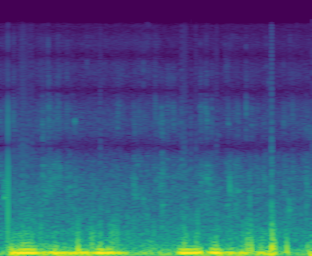

File: /home/aayushmnit/.fastai/cache/rs_20000/64030_44.0_47.0_call.wav-501ac824490110983d19ccac0d3ba48f/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: negative/positive / 4.67 / 0.01


Channel 0.0 (256x312):


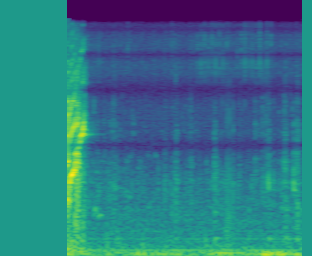

File: /home/aayushmnit/.fastai/cache/rs_20000/640170005_26.0_32.0_call.wav-33fd1ac3577710b571e902d425881639/0.wav
Total Length: 6.0 seconds
Number of Channels: 1
Label: negative/positive / 4.59 / 0.01
0.78s-4.78s of original clip


Channel 0.0 (256x312):


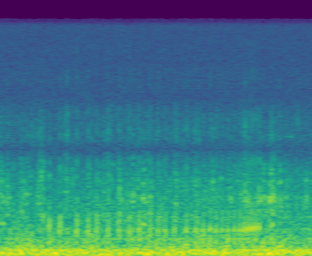

File: /home/aayushmnit/.fastai/cache/rs_20000/os_9_27_2017_08_14_00__0002_0_3.1296886462298703_call.wav-b5efb52fb340000e7ea886ce61f8fff4/0.wav
Total Length: 3.13 seconds
Number of Channels: 1
Label: positive/negative / 4.13 / 0.02


Channel 0.0 (256x312):


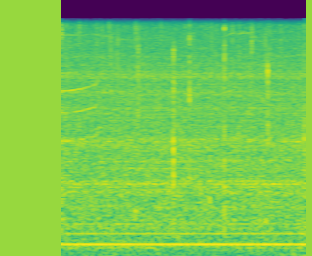

File: /home/aayushmnit/.fastai/cache/rs_20000/64023_184.0_186.0_call.wav-638633f47c2934c99bbb6da6bafe392b/0.wav
Total Length: 2.0 seconds
Number of Channels: 1
Label: negative/positive / 4.09 / 0.02


Channel 0.0 (256x312):


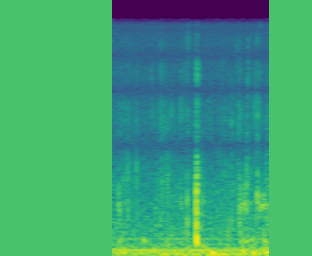

File: /home/aayushmnit/.fastai/cache/rs_20000/60026_1240_1242.0990723048558_Noise.wav-ab61c6669efb178051c06c9cd970af2f/0.wav
Total Length: 2.1 seconds
Number of Channels: 1
Label: positive/negative / 3.94 / 0.02


Channel 0.0 (256x312):


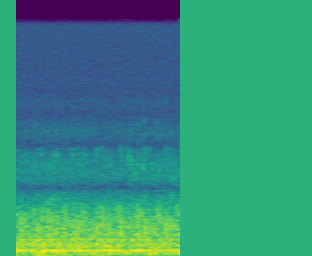

File: /home/aayushmnit/.fastai/cache/rs_20000/640200000_8.0_12.0_call.wav-bd13b710a62ee1283d073704d357a1bc/0.wav
Total Length: 4.0 seconds
Number of Channels: 1
Label: negative/positive / 3.79 / 0.02
0.01s-4.01s of original clip


Channel 0.0 (256x312):


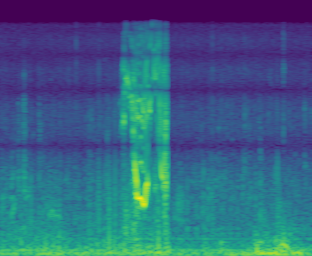

File: /home/aayushmnit/.fastai/cache/rs_20000/64031_645_649.2927139305625_Noise.wav-0e5ebfbd45f035f622f76d455fe80517/0.wav
Total Length: 4.29 seconds
Number of Channels: 1
Label: positive/negative / 3.67 / 0.03
0.31s-4.31s of original clip


Channel 0.0 (256x312):


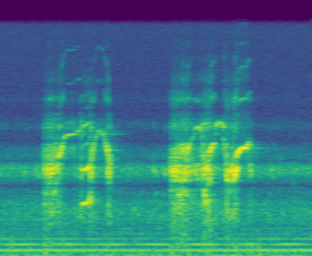

File: /home/aayushmnit/.fastai/cache/rs_20000/780210003_45.0_48.0_call.wav-0b8242e28fcaefac4d2f9b281f0777cf/0.wav
Total Length: 3.0 seconds
Number of Channels: 1
Label: negative/positive / 3.60 / 0.03


Channel 0.0 (256x312):


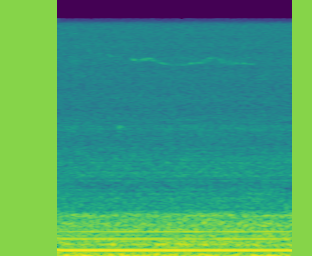

File: /home/aayushmnit/.fastai/cache/rs_20000/66049_343.0_349.0_call.wav-6291ceaebeda2b1cc4ecd0cff5894d8d/0.wav
Total Length: 6.0 seconds
Number of Channels: 1
Label: negative/positive / 3.57 / 0.03
0.52s-4.52s of original clip


Channel 0.0 (256x312):


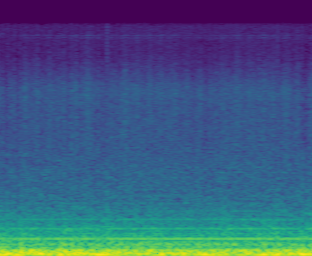

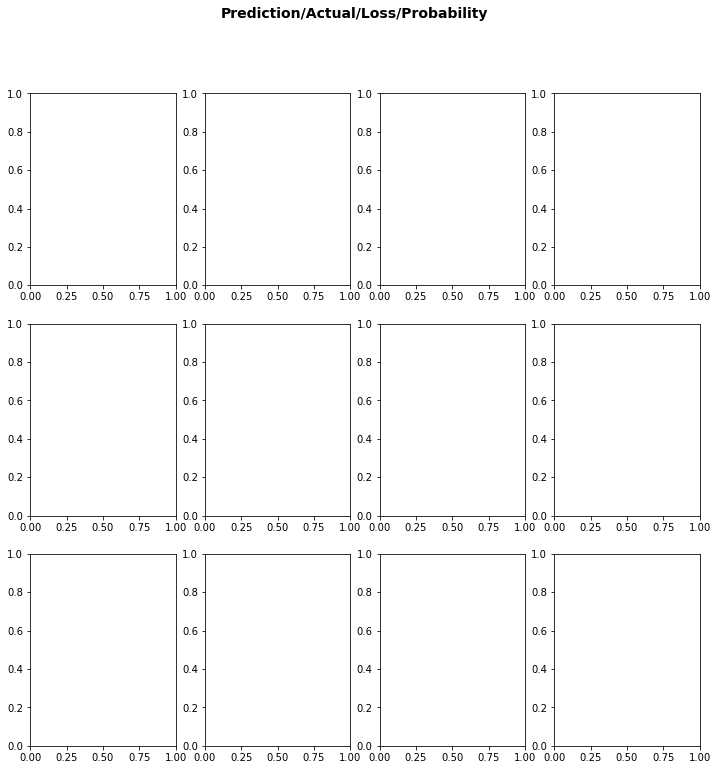

In [124]:
interp.plot_top_losses(10, heatmap = False)

## Model Evaluation on testing set

In [137]:
test_data_folder = Path("./data/test")
test_data_folder

PosixPath('data/test')

In [184]:
test = AudioList.from_folder(test_data_folder, config=config).split_none().label_from_folder()
testdb = test.transform(tfms).databunch(bs=64)
true_value = pd.Series(list(testdb.train_ds.y.items))

Preprocessing: Resampling to 20000


In [273]:
predictions = []
for item in tqdm_notebook(testdb.x):
    predictions.append(learn.predict(item)[2][1])

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [309]:
print("AUC Score :{0:.2f} \nF-1 Score :{1:.2f} \nAccuracy Score :{2:.2f} \nAveragePrecisionScore :{1:.2f}".format(
    roc_auc_score(true_value,pd.Series(predictions)), 
    f1_score(true_value,pd.Series(predictions)>0.5), 
    accuracy_score(true_value,pd.Series(predictions)>0.5),
    average_precision_score(true_value,pd.Series(predictions) )
))

AUC Score :0.98 
F-1 Score :0.92 
Accuracy Score :0.93 
AveragePrecisionScore :0.92


Confusion matrix, without normalization
[[678  55]
 [ 28 458]]


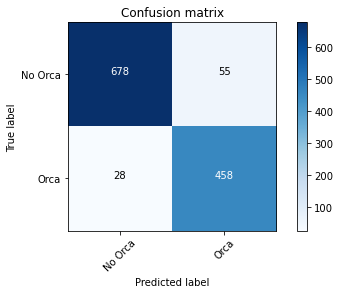

In [310]:
plot_confusion_matrix(true_value, pd.Series(predictions)>0.5, classes=["No Orca","Orca"])

## Scoring for evalauation

### 2 sec

In [ ]:
learn = load_learner("./data/models/", 'stg2-rn18.pkl')

In [9]:
test_data_folder = Path("./test2Sec")
tfms=None
test = AudioList.from_folder(test_data_folder, config=config).split_none().label_empty()
testdb = test.transform(tfms).databunch(bs=64)

Preprocessing: Resampling to 20000


In [12]:
predictions = []
pathList = [] 
for item in tqdm_notebook(testdb.x):
    predictions.append(learn.predict(item)[2][1])
    pathList.append(str(item.path))

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [45]:
prediction = pd.DataFrame({'FilePath': pathList, 'pred': predictions})
prediction['FileName'] = prediction.FilePath.apply(lambda x: x.split('/')[6].split("-")[0])
prediction.loc[:,['FileName','pred']].to_csv('./test2Sec.csv', index=False)

### 3 Sec

In [53]:
test_data_folder = Path("./test3Sec")
tfms=None
test = AudioList.from_folder(test_data_folder, config=config).split_none().label_empty()
testdb = test.transform(tfms).databunch(bs=64)

Preprocessing: Resampling to 20000


In [54]:
predictions = []
pathList = [] 
for item in tqdm_notebook(testdb.x):
    predictions.append(learn.predict(item)[2][1])
    pathList.append(str(item.path))

/anaconda/envs/py37_pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
prediction = pd.DataFrame({'FilePath': pathList, 'pred': predictions})
prediction['FileName'] = prediction.FilePath.apply(lambda x: x.split('/')[6].split("-")[0])
prediction.loc[:,['FileName','pred']].to_csv('./test3Sec.csv', index=False)

## Checks

In [34]:
test2secDF = pd.read_csv("./data/test/OrcasoundLab07052019_Test/test2Sec.csv")
test2secDF['pred'] = test2secDF.pred.apply(lambda x: float(x.split('(')[1].split(')')[0]))

In [46]:
test2secDF['startTime'] = test2secDF.FileName.apply(lambda x: int(x.split('__')[1].split('.')[0].split('_')[0]))
test2secDF = test2secDF.sort_values(['startTime']).reset_index(drop=True)

In [58]:
test2secDF.iloc[100:200]

FileName    pred  startTime
100  os_7_05_2019_08_24_00__100_102.wav  0.9917        100
101  os_7_05_2019_08_24_00__101_103.wav  0.8123        101
102  os_7_05_2019_08_24_00__102_104.wav  0.7663        102
103  os_7_05_2019_08_24_00__103_105.wav  0.9933        103
104  os_7_05_2019_08_24_00__104_106.wav  0.9966        104
..                                  ...     ...        ...
195  os_7_05_2019_08_24_00__195_197.wav  0.9581        195
196  os_7_05_2019_08_24_00__196_198.wav  0.5670        196
197  os_7_05_2019_08_24_00__197_199.wav  0.4932        197
198  os_7_05_2019_08_24_00__198_200.wav  0.0955        198
199  os_7_05_2019_08_24_00__199_201.wav  0.0956        199

[100 rows x 3 columns]

In [92]:
test2secDF.head()

FileName    pred  startTime
0  os_7_05_2019_08_24_00__0_2.wav  0.0715          0
1  os_7_05_2019_08_24_00__1_3.wav  0.8080          1
2  os_7_05_2019_08_24_00__2_4.wav  0.1142          2
3  os_7_05_2019_08_24_00__3_5.wav  0.0798          3
4  os_7_05_2019_08_24_00__4_6.wav  0.2244          4

In [70]:
test2secDF.tail()

FileName    pred  startTime
1794  os_7_05_2019_08_24_00__1794_1796.wav  0.0674       1794
1795  os_7_05_2019_08_24_00__1795_1797.wav  0.3326       1795
1796  os_7_05_2019_08_24_00__1796_1798.wav  0.1319       1796
1797  os_7_05_2019_08_24_00__1797_1799.wav  0.0741       1797
1798  os_7_05_2019_08_24_00__1798_1800.wav  0.0646       1798

In [123]:
## Rolling Window (to average at per second level)
submission = pd.DataFrame({'pred': list(test2secDF.rolling(2)['pred'].mean().values)}).reset_index().rename(columns={'index':'StartTime'})

## Updating first row
submission.loc[0,'pred'] = test2secDF.pred[0]

## Adding lastrow
lastLine = pd.DataFrame({'StartTime':[submission.StartTime.max()+1],'pred':[test2secDF.pred[test2secDF.shape[0]-1]]})
submission = submission.append(lastLine, ignore_index=True)

finalSubmission = submission.loc[submission.pred > 0.5,:].reset_index(drop=True)
finalSubmission['Duration'] = 1

In [126]:
finalSubmission.loc[:,['StartTime','Duration']].to_csv('./submission2SecFastAI.csv', index=False)